# Dataset History 

A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of in patient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The
agency wants to analyze the data to research on the healthcare costs and their utilization.

The goals of this project are:

* To record the patient statistics, the agency wants to find the age category of people who frequent visit to the hospital and has the maximum expenditure. In order of severity of the diagnosis and treatments and to find out the expensive treatments, the agency wants to find the diagnosis related group that has maximum hospitalization and expenditure.


* To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs.


* To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources.


* Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race.


* To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs.


Source:https://www.kaggle.com/datasets/ravichaubey1506/healthcare-cost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#model building 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings('ignore')


In [2]:

Data=pd.read_csv('HospitalCosts.csv', index_col=False)

In [3]:
Data.head(10)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
5,17,0,0,1.0,3305,347
6,17,1,4,1.0,2205,754
7,16,1,2,1.0,1167,754
8,16,1,1,1.0,532,753
9,17,1,2,1.0,1363,758


In [4]:
Data.tail(10)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
490,0,0,2,1.0,1282,640
491,0,0,2,1.0,1393,640
492,15,1,4,2.0,3074,758
493,0,0,2,1.0,1266,640
494,0,1,3,1.0,1886,640
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640
499,0,0,4,1.0,4931,640


In [5]:
print('the dataset contains {} rows and {} colomns'.format(Data.shape[0],Data.shape[1]))

the dataset contains 500 rows and 6 colomns


In [6]:
Data.info(max_cols=len(Data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


# Data Preprocessing

In [7]:
Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497     True
498    False
499    False
Length: 500, dtype: bool

In [8]:
#checking on missing data
Data.isna().sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [9]:
Data['RACE'].unique()

array([ 1.,  4.,  6.,  2.,  5., nan,  3.])

In [10]:
Data.replace('unknown',np.nan,inplace=True)

In [11]:
Data['RACE'].fillna(0).astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: RACE, Length: 500, dtype: int32

### Renaming the columns

In [12]:
Data.rename(columns={'FEMALE':'GENDER','LOS':'LENGTH_OF_STAY','TOTCHG':'COST'}, inplace=True)
Data.head(20)

,AGE,GENDER,LENGTH_OF_STAY,RACE,COST,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
5,17,0,0,1.0,3305,347
6,17,1,4,1.0,2205,754
7,16,1,2,1.0,1167,754
8,16,1,1,1.0,532,753
9,17,1,2,1.0,1363,758


In [13]:
# spliting the Age into age groups
ages = pd.DataFrame(Data['AGE'])     
bins = [0, 5, 10, 15, 20]
labels = ['0-4', '5-9', '10-14', '15-20']
Data['AGE_GROUP'] = pd.cut(ages.AGE, bins, labels = labels,include_lowest = True)

# spliting thelength of stay into age groups
stay = pd.DataFrame(Data['LENGTH_OF_STAY'])     
bins = [0, 10, 20, 30, 40,50]
labels = ['0-9', '10-19', '20-29', '30-39','40-50']
Data['LOS'] = pd.cut(stay.LENGTH_OF_STAY, bins, labels = labels,include_lowest = True)


In [14]:
Data.nunique()

AGE                18
GENDER              2
LENGTH_OF_STAY     19
RACE                6
COST              441
APRDRG             63
AGE_GROUP           4
LOS                 5
dtype: int64

In [15]:
uni_var= ['AGE_GROUP','GENDER','LOS','RACE','COST','APRDRG']

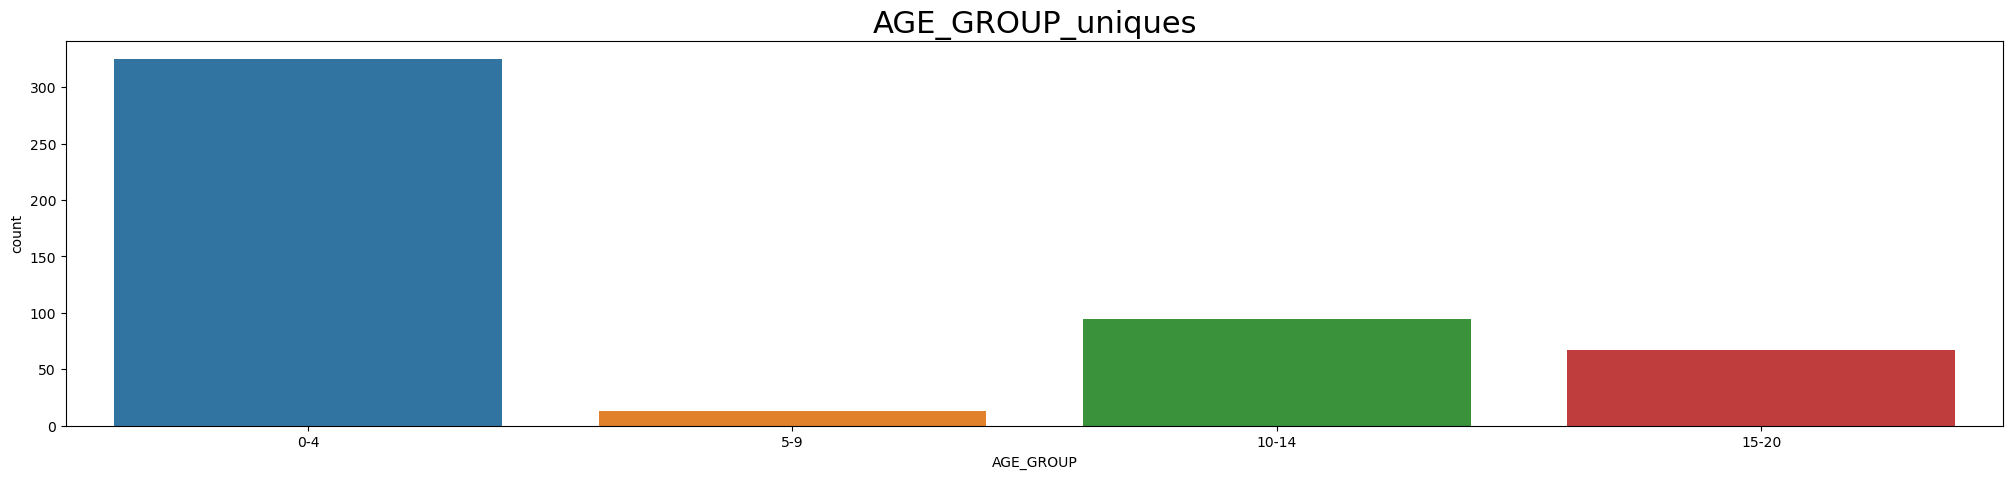

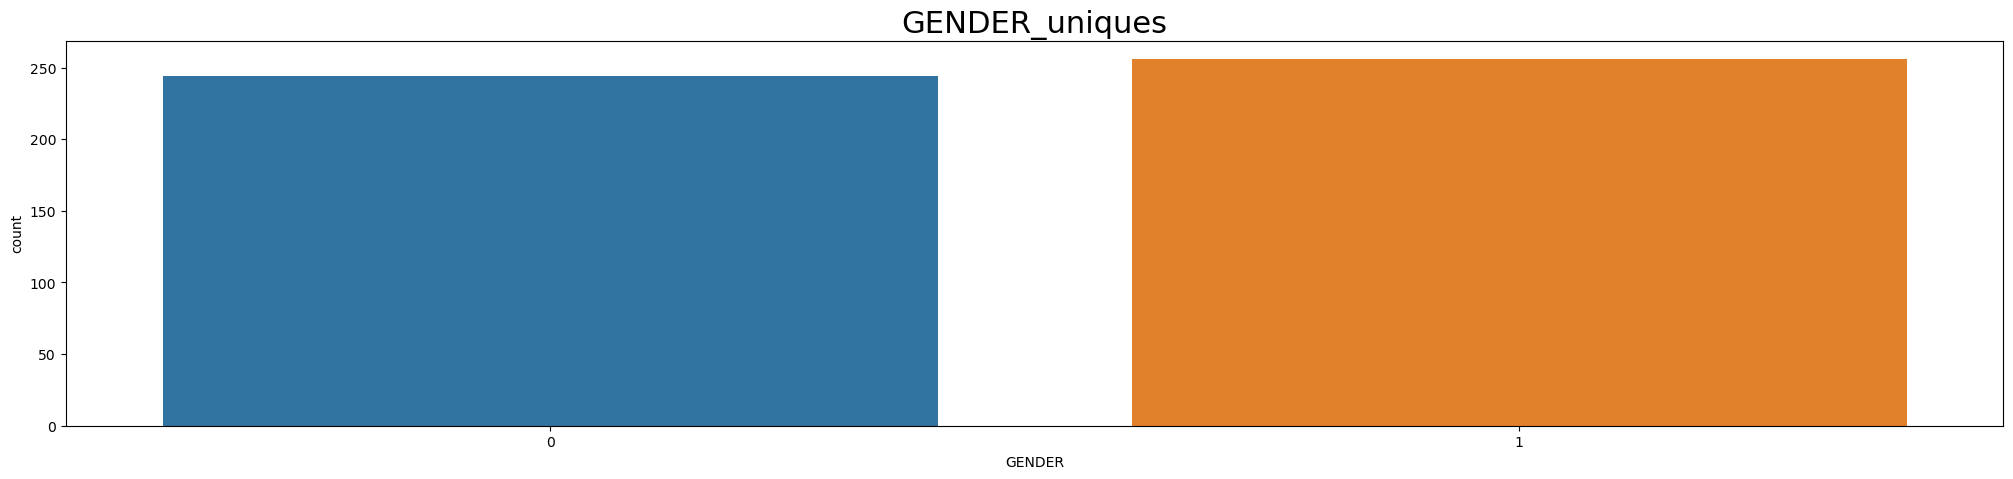

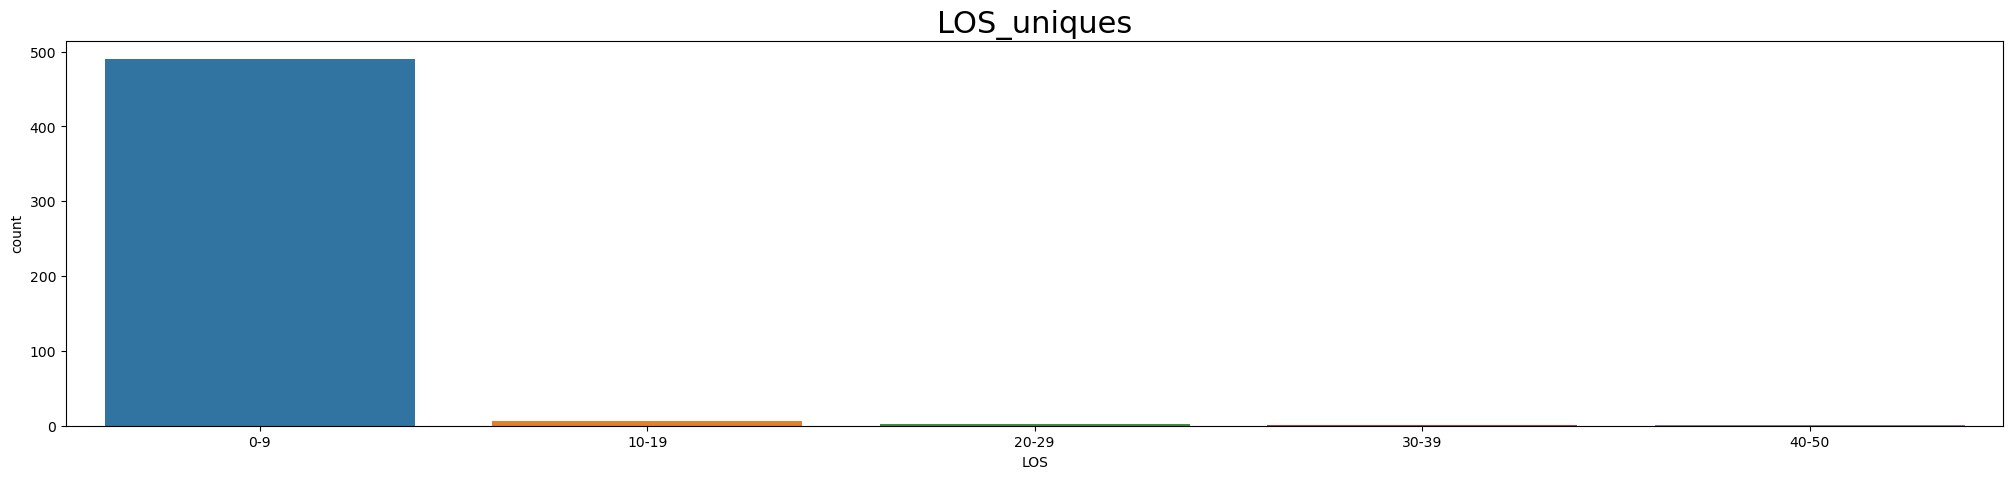

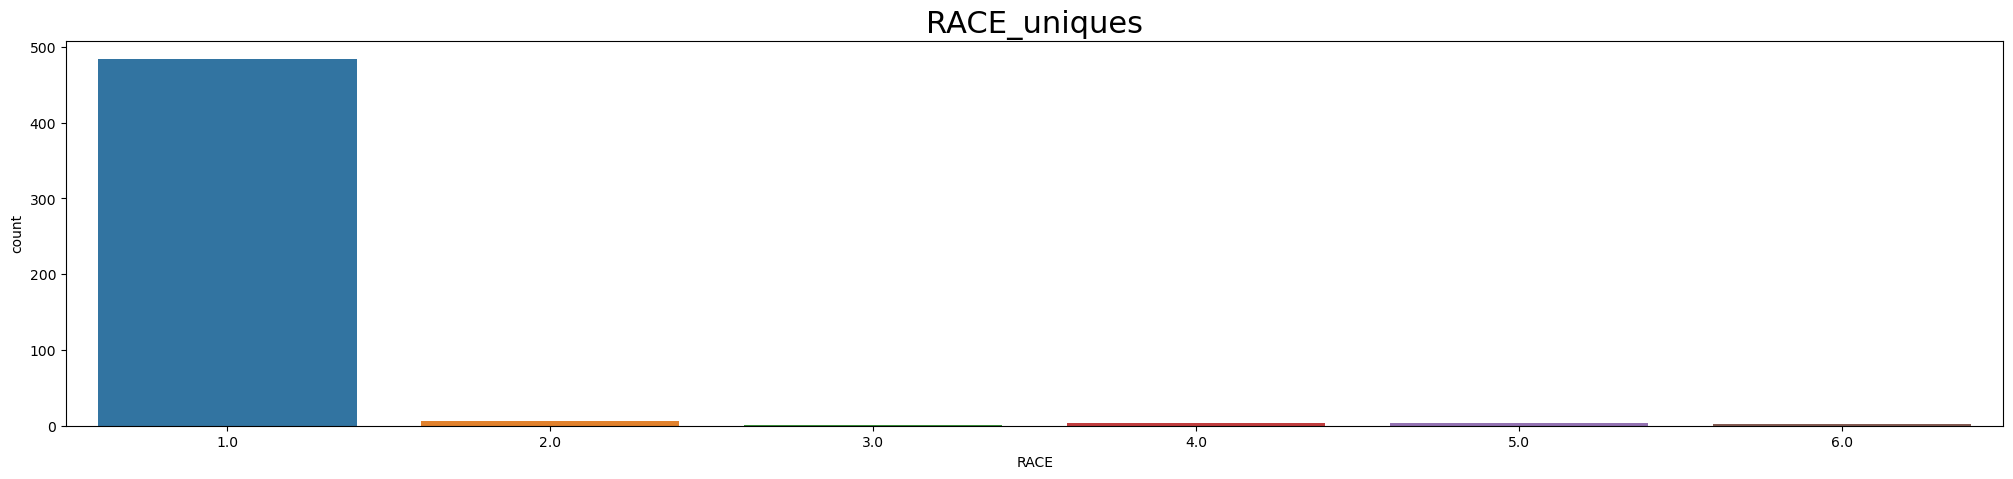

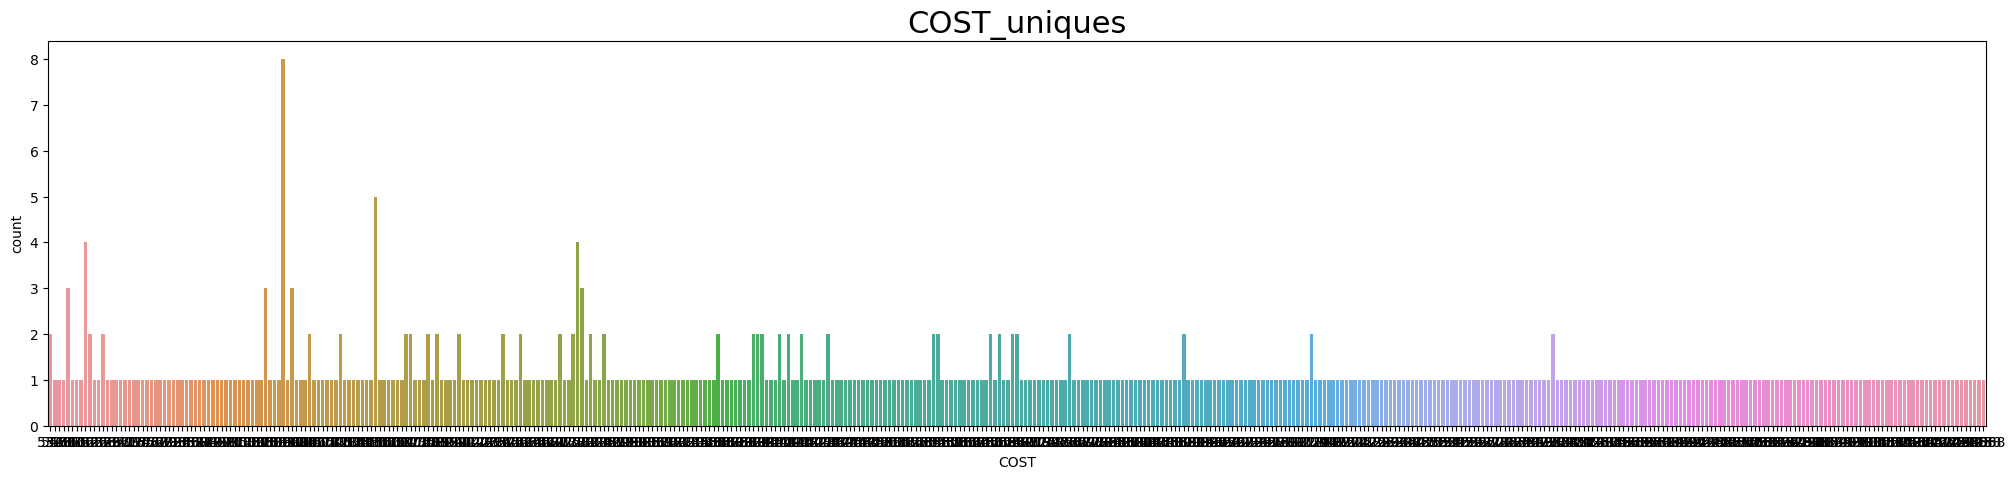

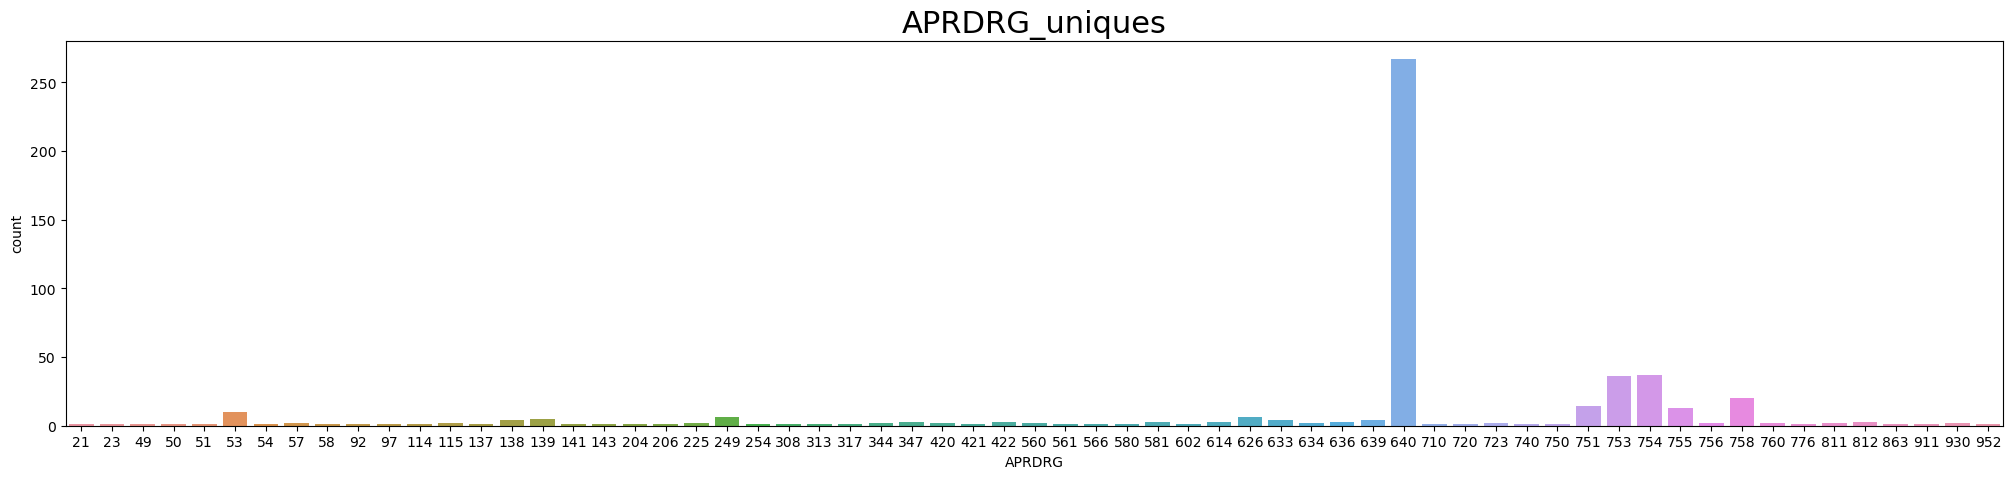

In [16]:
for col in uni_var:
    plt.figure(figsize=(25,5))
    sns.countplot(Data[col])
    plt.title(str(col) +'_'+ 'uniques' ,fontsize=22)
    plt.show()

# EXPLORATORY ANALYSIS

### Statistical exploration

In [17]:
Data.describe().T 


,count,mean,std,min,25%,50%,75%,max
AGE,500.0,5.086000,6.949474,0.0,0.00,0.0,13.00,17.0
GENDER,500.0,0.512000,0.500357,0.0,0.00,1.0,1.00,1.0
LENGTH_OF_STAY,500.0,2.828000,3.363487,0.0,2.00,2.0,3.00,41.0
RACE,499.0,1.078156,0.514746,1.0,1.00,1.0,1.00,6.0
COST,500.0,2774.388000,3888.407367,532.0,1216.25,1536.5,2530.25,48388.0
APRDRG,500.0,616.360000,178.316044,21.0,640.00,640.0,751.00,952.0



# Distribution of Numerical features

In [18]:
Data_num= Data.loc[:,['AGE','GENDER','LENGTH_OF_STAY','RACE','COST','APRDRG']]
Data_num.head()

,AGE,GENDER,LENGTH_OF_STAY,RACE,COST,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


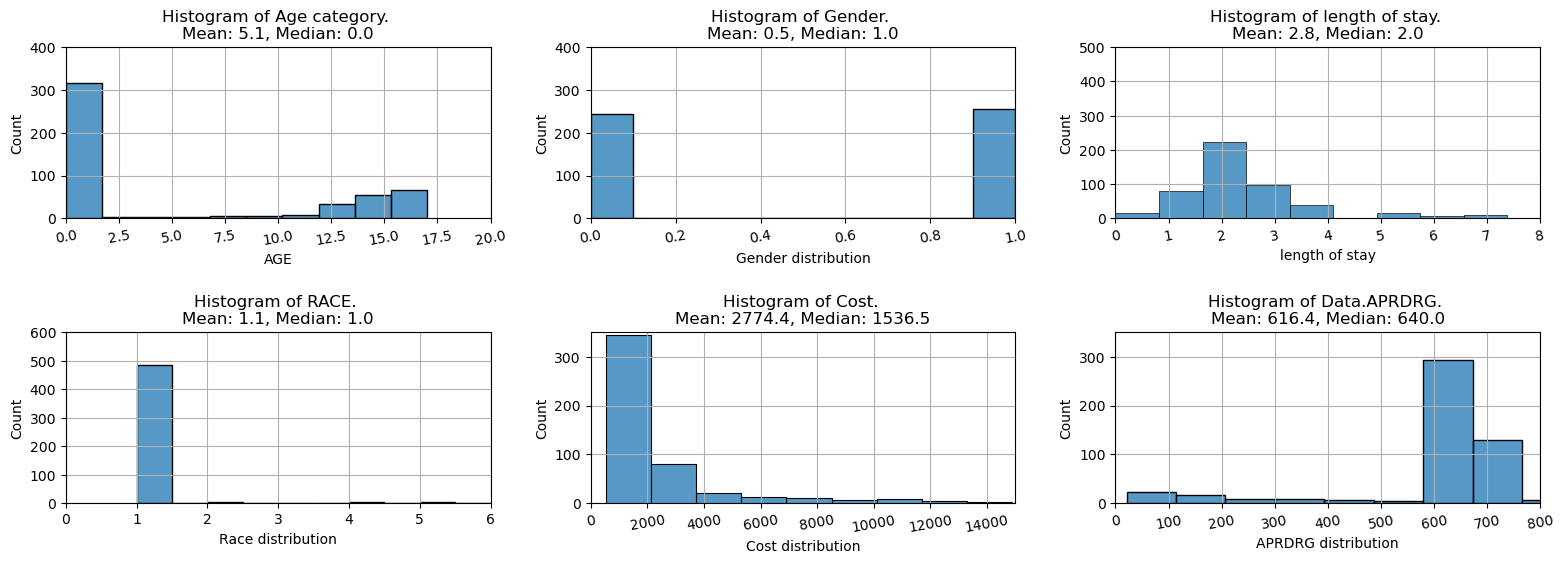

In [19]:

plt.figure(figsize=(16,6))

plt.subplot(2,3,1)
sns.histplot(Data.AGE,bins=10)
plt.title('''Histogram of Age category. 
Mean: {:.1f}, Median: {:.1f}'''.format(Data.AGE.mean(),Data.AGE.median()));
plt.xlabel('AGE')
plt.axis([0,20,0,400])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(2,3,2)
sns.histplot(Data.GENDER,bins=10)
plt.title('''Histogram of Gender. 
Mean: {:.1f}, Median: {:.1f}'''.format(Data.GENDER.mean(),Data.GENDER.median()));
plt.axis([0,1,0,400])
plt.xlabel('Gender distribution')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(2,3,3)
sns.histplot(Data.LENGTH_OF_STAY,bins=50)
plt.title('''Histogram of length of stay. 
Mean: {:.1f}, Median: {:.1f}'''.format(Data.LENGTH_OF_STAY.mean(),Data.LENGTH_OF_STAY.median()));
plt.xlabel('length of stay')
plt.axis([0,8,0,500])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(2,3,4)
sns.histplot(Data.RACE,bins=10)
plt.title('''Histogram of RACE. 
Mean: {:.1f}, Median: {:.1f}'''.format(Data.RACE.mean(),Data.RACE.median()));
plt.axis([0,6,0,600])
plt.xlabel('Race distribution')
plt.grid()



plt.subplot(2,3,5)
sns.histplot(Data.COST,bins=30)
plt.title('''Histogram of Cost. 
Mean: {:.1f}, Median: {:.1f}'''.format(Data.COST.mean(),Data.COST.median()));
plt.axis([0,15000,0,350])
plt.xlabel('Cost distribution')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(2,3,6)
sns.histplot(Data.APRDRG,bins=10)
plt.title('''Histogram of Data.APRDRG. 
Mean: {:.1f}, Median: {:.1f}'''.format(Data.APRDRG.mean(),Data.APRDRG.median()));
plt.axis([0,800,0,350])
plt.xlabel('APRDRG distribution')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);


# univariate histograms (distributions) for each attribute

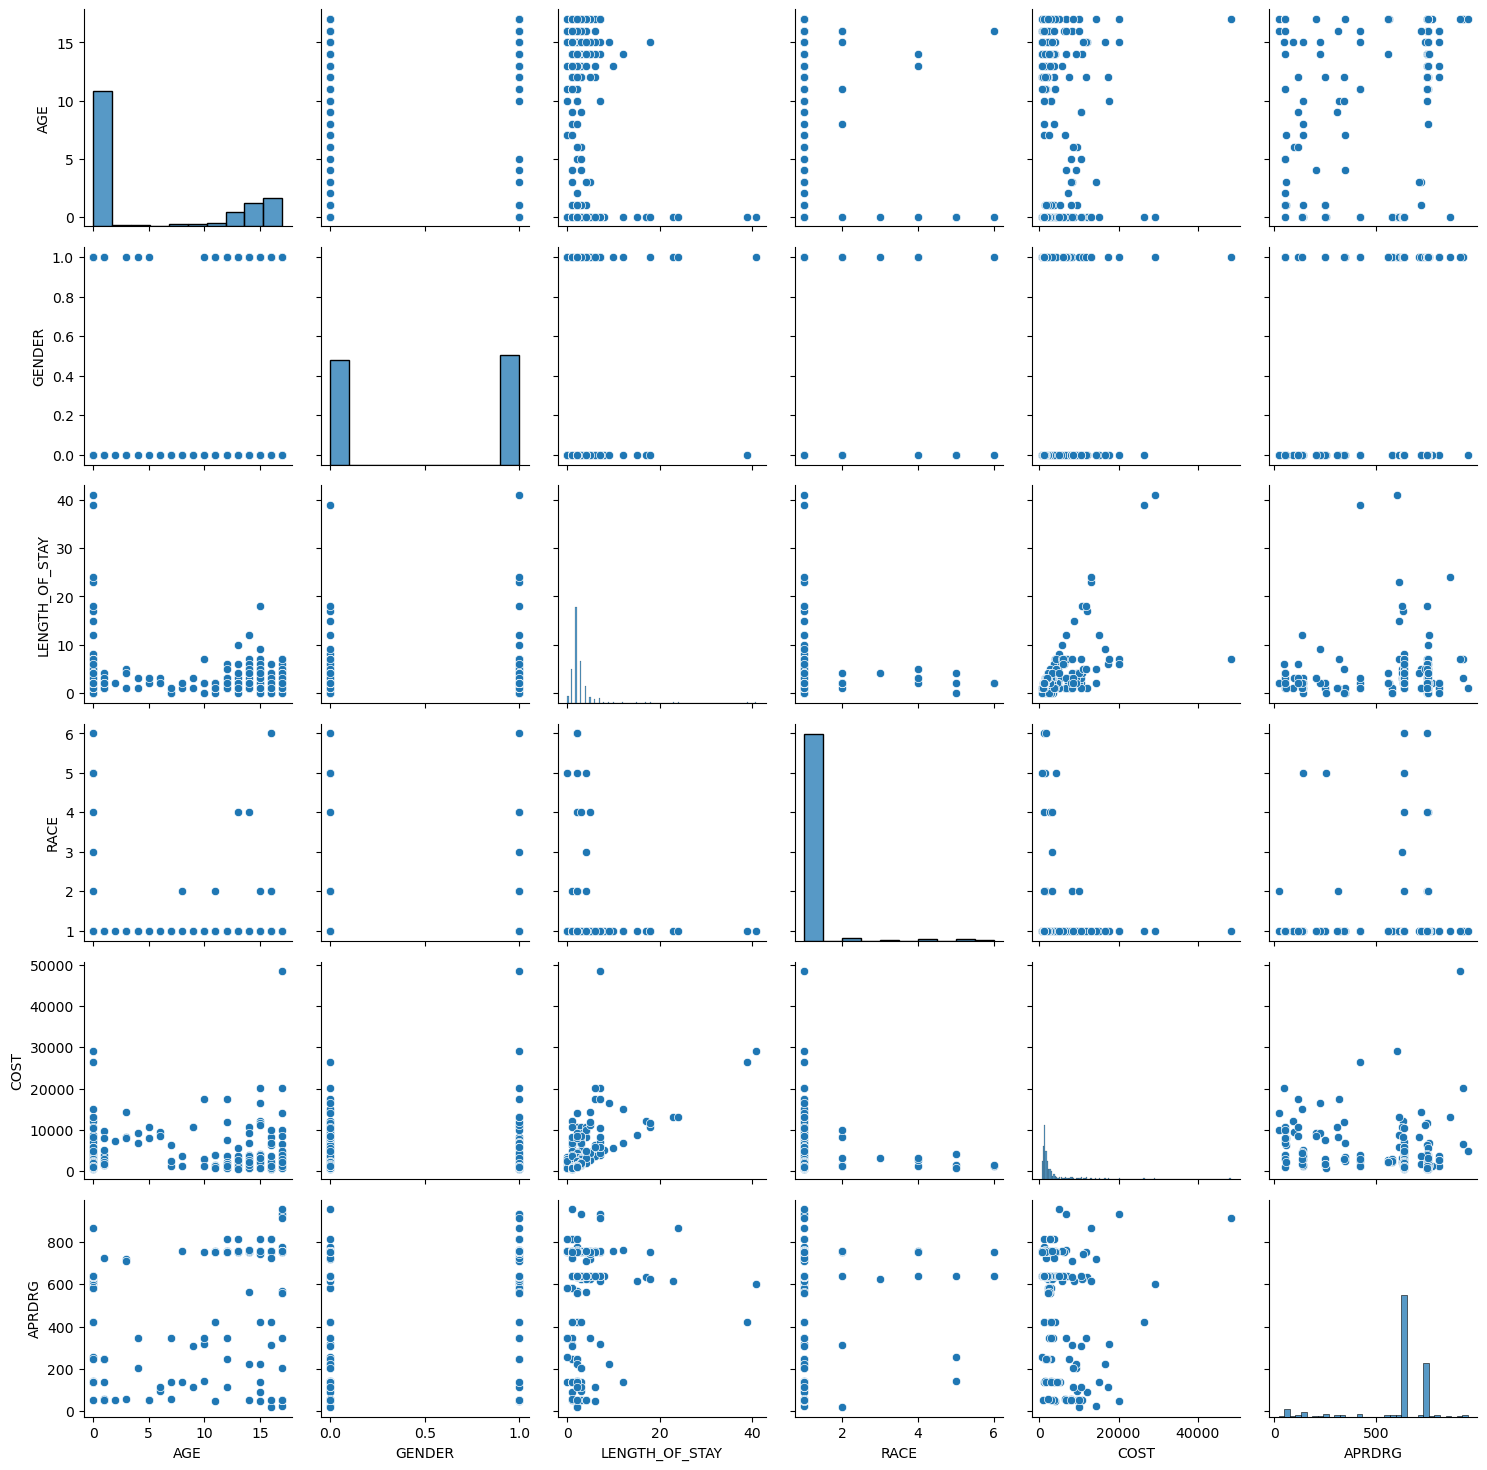

In [20]:
# sns.pairplot(Data)
# plt.show()
g = sns.PairGrid(Data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

#### 1.Age category of people who frequent the hospital and has the maximum expenditure

In [21]:
Data['AGE_GROUP'].value_counts().to_frame()

,AGE_GROUP
0-4,325
10-14,95
15-20,67
5-9,13


In [22]:
Data['AGE'].mean()

5.086

In [23]:
Age_VS_COST=Data.groupby(['AGE_GROUP','GENDER'])['COST'].mean()\
.to_frame()\
.rename(columns={'COST':'MaxCosts'})\
.reset_index()
Age_VS_COST=Age_VS_COST.sort_values(by=['AGE_GROUP'],ascending=False)
Age_VS_COST

,AGE_GROUP,GENDER,MaxCosts
6,15-20,0,4172.315789
7,15-20,1,3430.250000
4,10-14,0,4125.700000
5,10-14,1,2352.553846
2,5-9,0,6434.333333
3,5-9,1,1160.000000
0,0-4,0,2487.071038
1,0-4,1,2345.598592


Text(0, 0.5, 'Hospital expenditure')

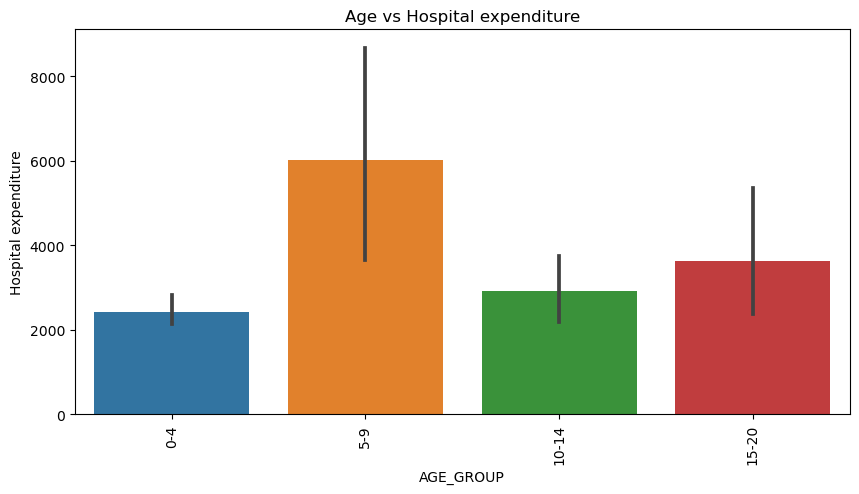

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Age vs Hospital expenditure")
plt.xticks(rotation=90)

sns.barplot(x=Data.AGE_GROUP, y=Data.COST)

# Add label for vertical axis
plt.ylabel("Hospital expenditure")

As the graph shows the paitents between the age gruop of 5 to 9 are those who  frquently visit the hospital and thier maximum expenditure is 6434.3.









#### 2. The diagnosis related group that has maximum hospitalization and expenditure

In [25]:
Data['APRDRG'].value_counts().unique()

array([267,  37,  36,  20,  14,  13,  10,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [26]:
Data['APRDRG'].mean()

616.36

In [27]:
APRDRG_Charges=Data.groupby(['APRDRG'])['COST'].max()\
.to_frame()\
.rename(columns={'COST':'MaxCosts'})\
.reset_index()
APRDRG_Charges.sort_values( by= 'APRDRG',ascending=False)

,APRDRG,MaxCosts
62,952,4833
61,930,20060
60,911,48388
59,863,13040
58,812,3625
...,...,...
4,51,3023
3,50,3908
2,49,20195
1,23,14174


Text(0, 0.5, 'Hospital expenditure')

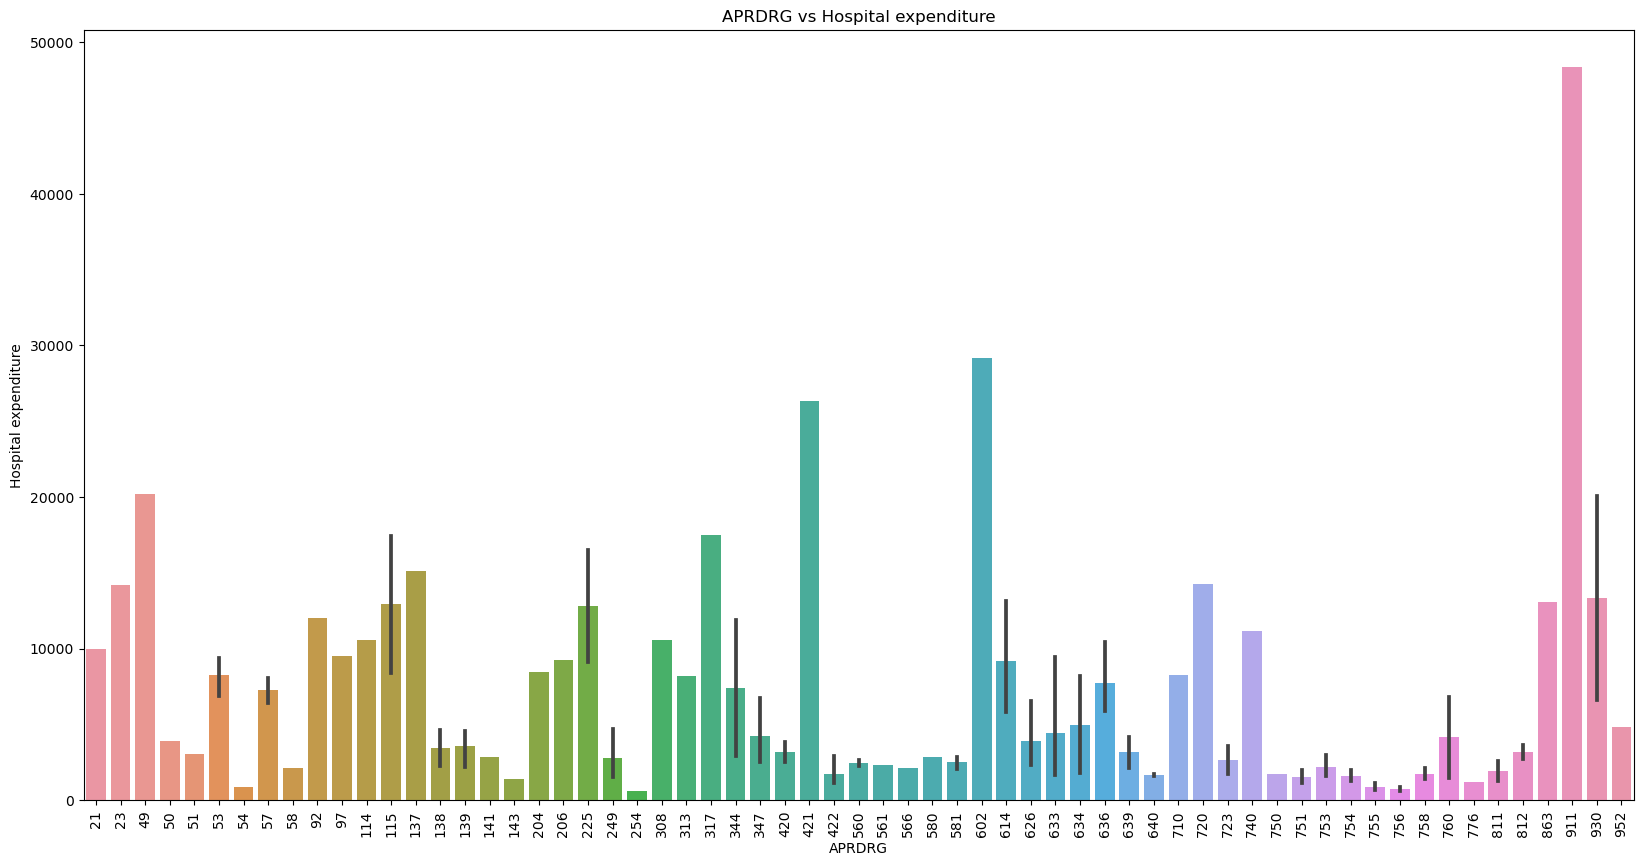

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("APRDRG vs Hospital expenditure")
plt.xticks(rotation=90)

sns.barplot(x=Data.APRDRG, y=Data.COST)

# Add label for vertical axis
plt.ylabel("Hospital expenditure")

The diagnosis related group that has maximum hospitalization and expenditure 911

#### The race of the patient is related to the hospitalization costs

In [29]:
RACE_Charges=Data.groupby(['RACE'])['COST'].max()\
.to_frame()\
.rename(columns={'COST':'MeanCosts'})\
.reset_index()
RACE_Charges.sort_values( by= 'RACE',ascending=False)

,RACE,MeanCosts
5,6.0,1535
4,5.0,4072
3,4.0,3126
2,3.0,3041
1,2.0,10002
0,1.0,48388


Text(0, 0.5, 'Cost')

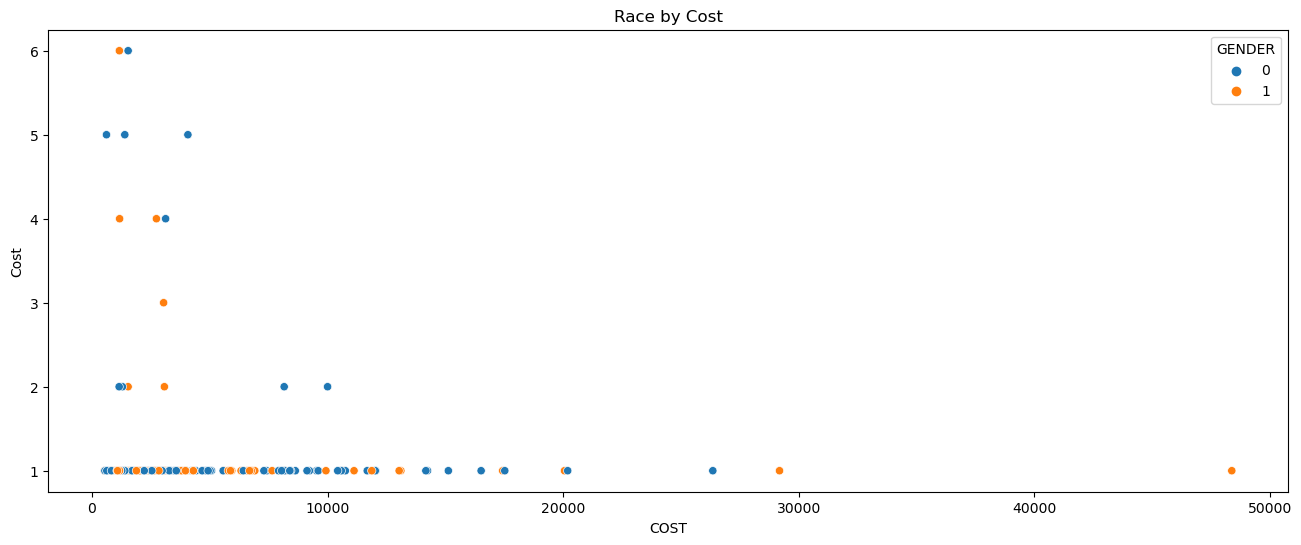

In [30]:
plt.figure(figsize=(16,6))
# plt.subplot(1,2,1)
plt.title('Race by Cost')
sns.scatterplot(y=Data.RACE ,x=Data.COST, hue= Data.GENDER)
plt.ylabel('Cost')


This figure tells us that the patients from race 0 and 1 have high cost. Consequently, we can say that a high number of race does not mean that a patient with high amount of cost.

#### The hospital costs by age and gender

In [31]:
Gender_Charges=Data.groupby(['AGE','GENDER'])['COST'].max()\
.to_frame()\
.rename(columns={'COST':'MaxCosts'})\
.reset_index()
Gender_Charges.sort_values( by= 'GENDER', ascending=False)

,AGE,GENDER,MaxCosts
30,17,1,48388
8,4,1,6762
20,12,1,17434
16,10,1,1160
1,0,1,29188
22,13,1,5615
24,14,1,6810
10,5,1,10584
18,11,1,3908
26,15,1,11125





#### 4. The length of stay can be predicted from age, gender, and race.


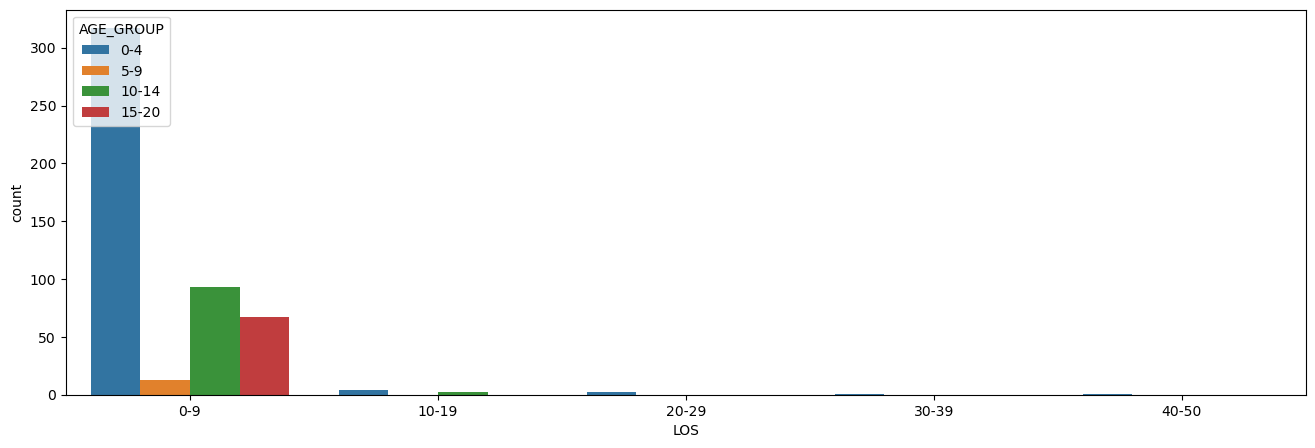

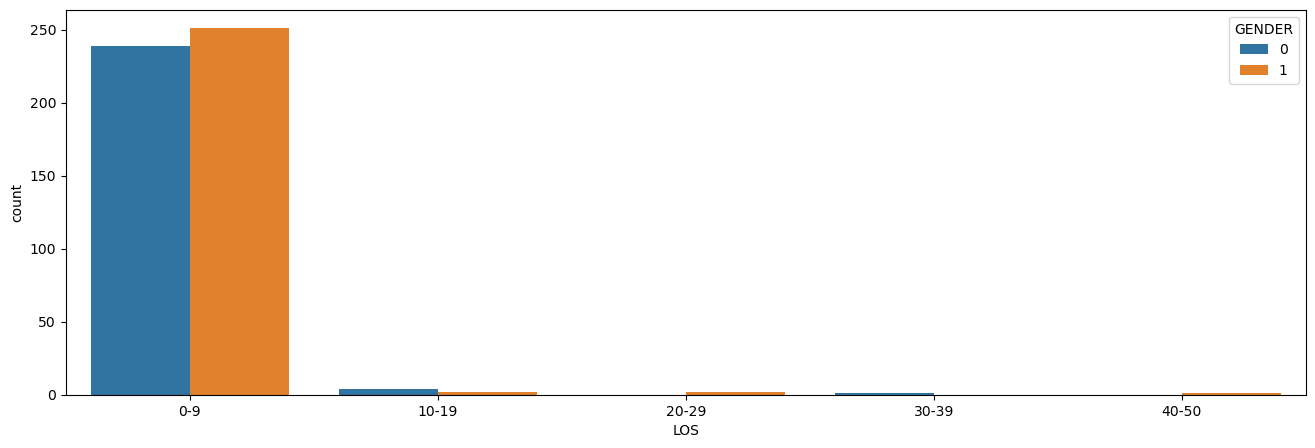

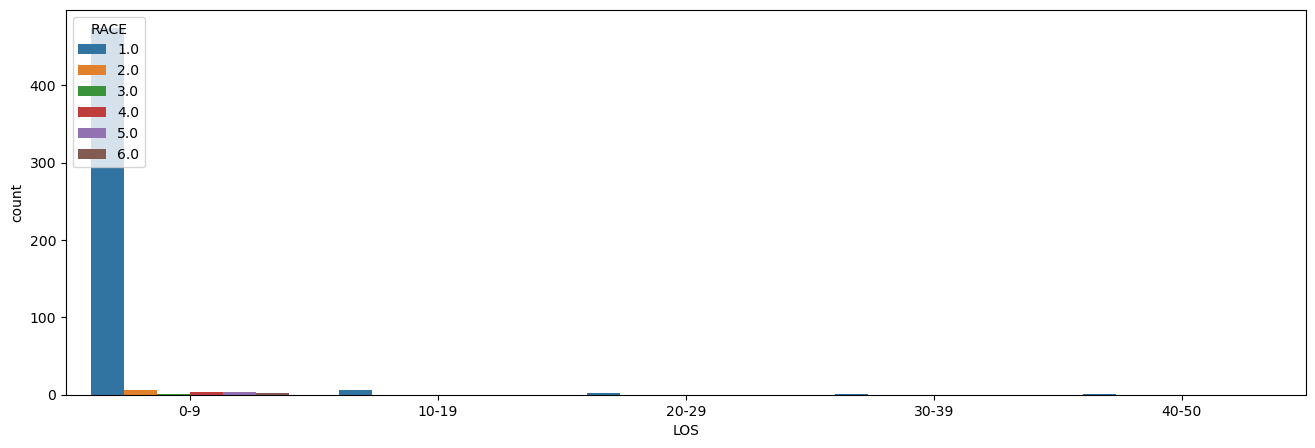

In [32]:
for i in [ 'AGE_GROUP','GENDER','RACE']:

            plt.figure(figsize=(16,5))

            sns.countplot(x='LOS', hue=i ,data=Data)

AS shown in the graphs, we can infere that,In graph 1, Age catagory from 0-4 has the most observations with highest number of records for 0-40 Days Stay. • In graph 2, male recorded the most number of patients for 30-39 Days.• In graph 3, RACE 1  has the most number of patients for 9-50 days.

#### The variable that mainly affects the hospital costs.

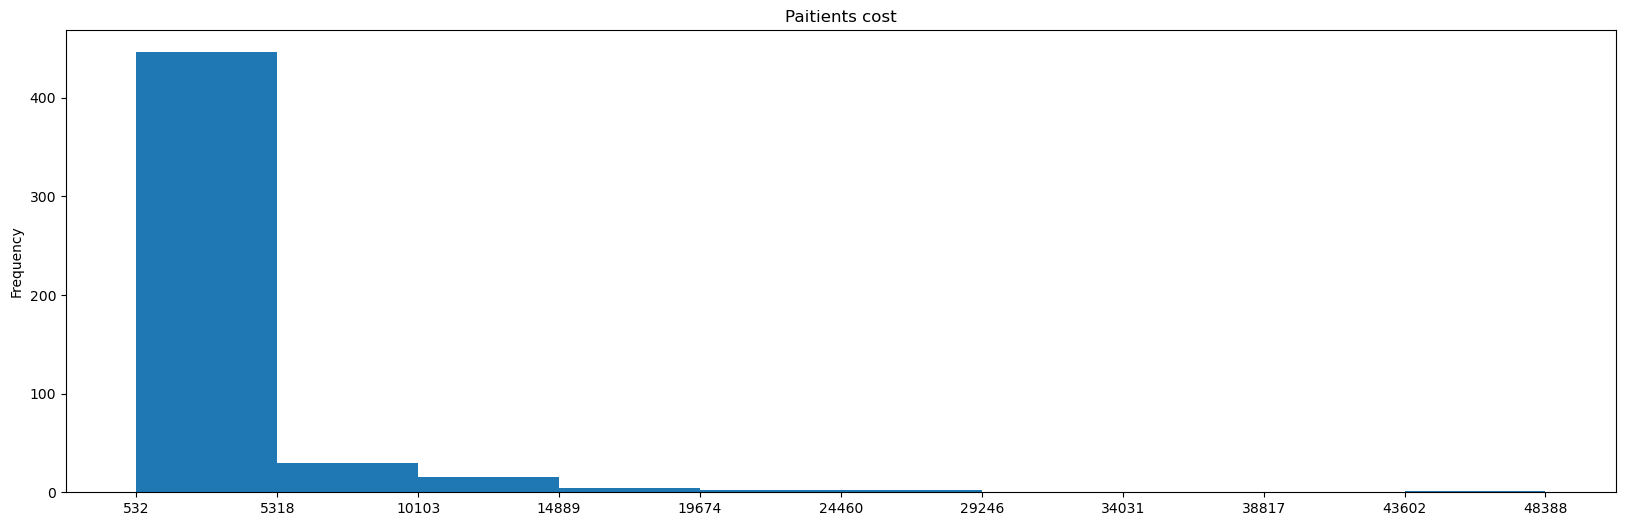

In [33]:
#graph showing minimum and maximum of hospital costs
count, bin_edges=np.histogram(Data['COST'])
Data['COST'].plot(kind='hist',xticks=bin_edges, figsize=(20,6))
plt.title('Paitients cost')
plt.show()



In [34]:
Data.corr()

,AGE,GENDER,LENGTH_OF_STAY,RACE,COST,APRDRG
AGE,1.000000,0.233979,-0.068640,0.015850,0.131680,0.147497
GENDER,0.233979,1.000000,0.035761,-0.038434,-0.060195,0.252863
LENGTH_OF_STAY,-0.068640,0.035761,1.000000,-0.017794,0.623193,0.005059
RACE,0.015850,-0.038434,-0.017794,1.000000,-0.018164,-0.043737
COST,0.131680,-0.060195,0.623193,-0.018164,1.000000,-0.330001
APRDRG,0.147497,0.252863,0.005059,-0.043737,-0.330001,1.000000


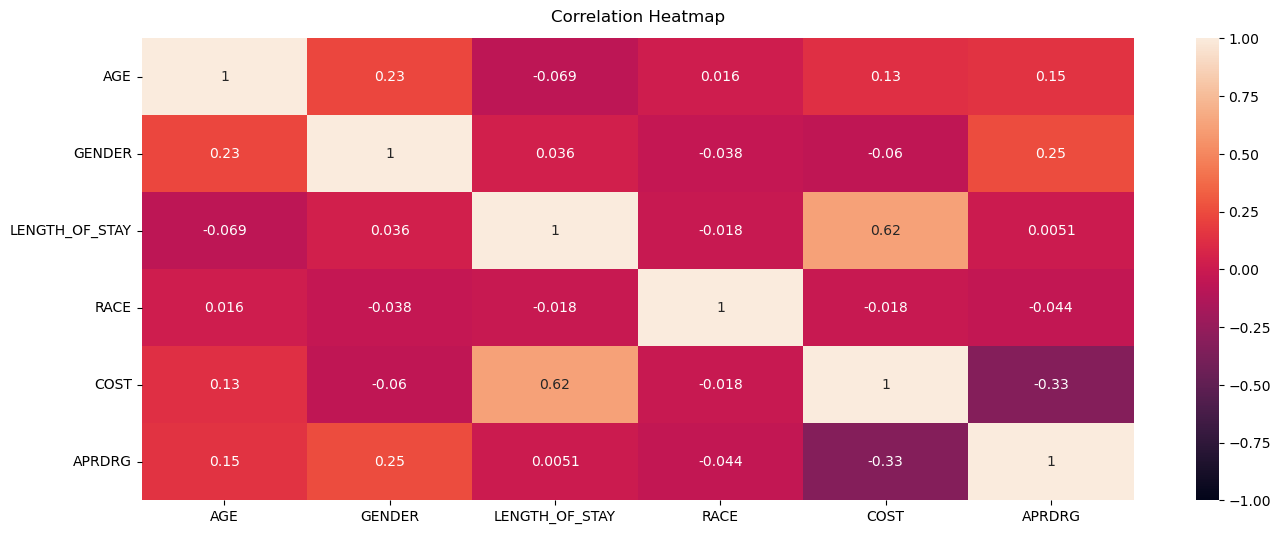

In [35]:
# sns.heatmap(Data.corr());
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Data.corr(), vmin=-1, vmax=1, annot=True)# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the graph we can observe that there is Strong correlation between hospital cost and length of the patients stay in the hospital since thier correlation value is above 0.5. However,there are weak correlations between cost and the rest mentioned variables since the values for the weak correlations are less than 0.5, we can term them as less significant. Here we can see that length of patients stay in the hospital has high probablity to affect  the hospital cost. 



# Exploring the correlation and the trend between hospital costs and length of patients stay using simple linear regression

In [36]:
list_drop = ['AGE','GENDER','RACE','APRDRG','AGE_GROUP', 'LOS']
Data.drop(list_drop, axis=1, inplace=True)


In [37]:
#remove rows with any values that are not finite
df_new = Data[np.isfinite(Data).all(1)]

In [38]:
# model fitting
X=df_new.drop(['COST'], axis=1)
Y=df_new['COST']

x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.25, random_state=0)
LR=LinearRegression().fit(x_train,y_train)

In [39]:
# # model prediction
y_train_pred=LR.predict(x_train)
y_test_pred=LR.predict(x_test)

print(LR.score(x_test,y_test))

0.6290891655902255


In [40]:
print('MSE train data:', mean_squared_error(y_train,y_train_pred))
print('MSE test data:', mean_squared_error(y_test,y_test_pred))

print('R2  train data:', r2_score(y_train,y_train_pred))
print('R2 test data:', r2_score(y_test,y_test_pred))


MSE train data: 10723369.947704501
MSE test data: 5040011.84292151
R2  train data: 0.31206092602430924
R2 test data: 0.6290891655902255
